# DBSCAN Hyperparameters

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

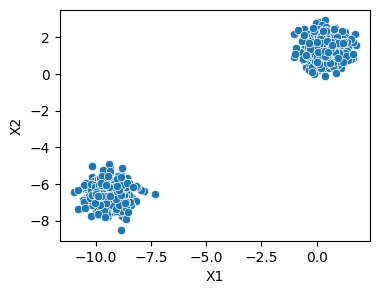

In [6]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=two_blobs, x='X1', y='X2');

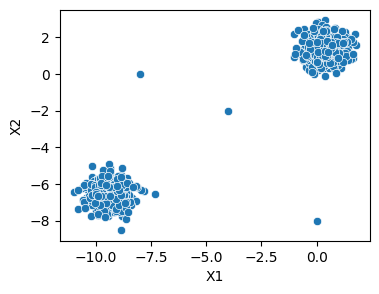

In [7]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2');

# Label Assignment

In [14]:
def display_categories(model, data):

    labels = model.fit_predict(data)

    plt.figure(figsize=(4,3))
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set2');

# DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a c

In [17]:
model = DBSCAN()

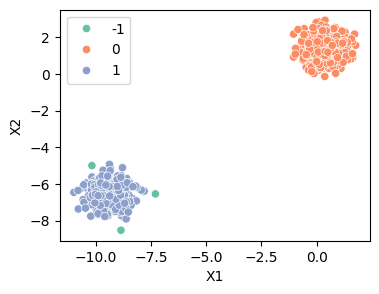

In [18]:
display_categories(model, two_blobs)

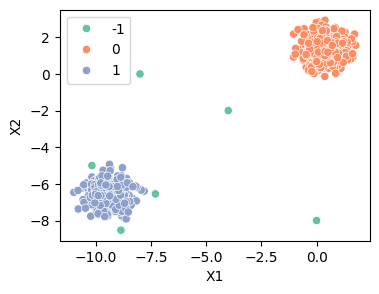

In [19]:
display_categories(model, two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum-bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

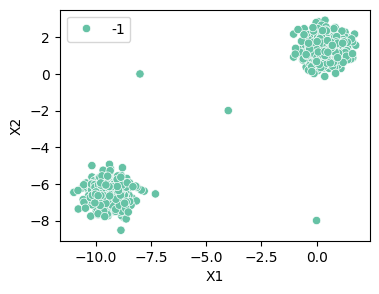

In [20]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)

model = DBSCAN(eps=0.001)

display_categories(model, two_blobs_outliers)

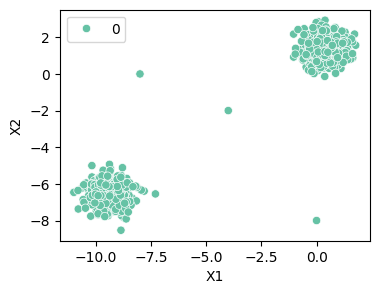

In [21]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)

model = DBSCAN(eps=10)

display_categories(model, two_blobs_outliers)

### How to find a proper epsilon?

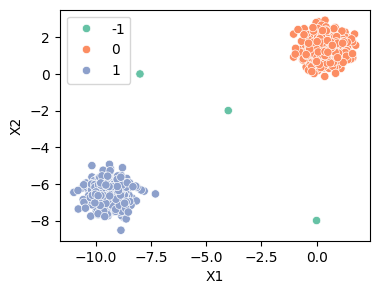

In [23]:
model = DBSCAN(eps=1)

display_categories(model, two_blobs_outliers)

In [24]:
model.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [25]:
np.sum(model.labels_ == -1)

3

In [29]:
print('Outlier Percentage:')
(100 * np.sum(model.labels_ == -1) / len( model.labels_)).round(2) 

Outlier Percentage:


0.3

# Charting reasonable Epsilon values

In [30]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [32]:
# np.arange(start=0.01,stop=10,step=0.01)    [start, stop)

In [33]:
num_outliers = []
per_outliers = []

for eps in np.linspace(.001, 10, 100):

    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)

    N = len(model.labels_)

    outliers = np.sum(model.labels_ == -1)

    num_outliers.append( outliers )
    per_outliers.append( 100*outliers / N )

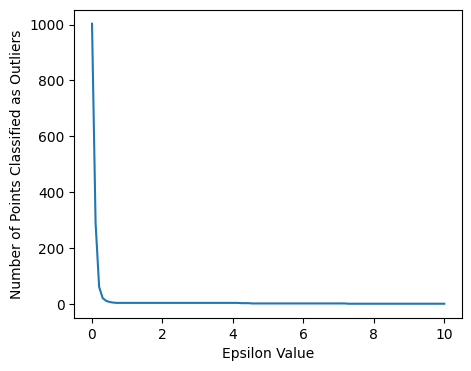

In [42]:
plt.figure(figsize=(5,4))

sns.lineplot(x=np.linspace(.001, 10, 100), y=num_outliers)

plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

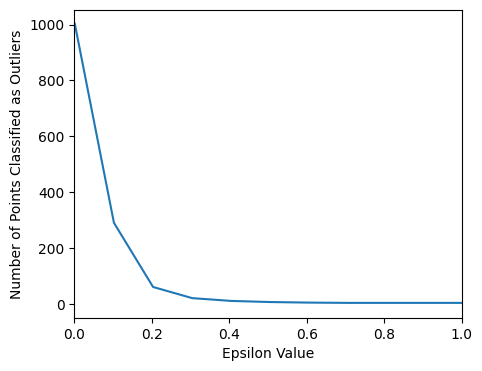

In [41]:
plt.figure(figsize=(5,4))

sns.lineplot(x=np.linspace(.001, 10, 100), y=num_outliers)

plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1);

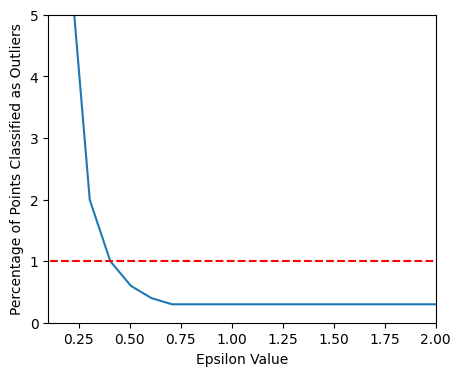

In [51]:
plt.figure(figsize=(5,4))

sns.lineplot(x=np.linspace(.001, 10, 100), y=per_outliers)

plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(.1,2)
plt.ylim(0, 5)
plt.hlines(y=1, xmin=0, xmax=2, colors='red', ls='--');

### How to find a good epsilon?

In [52]:
model = DBSCAN(eps=.4)

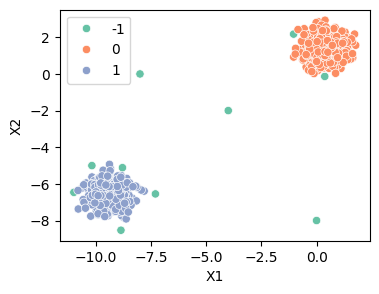

In [53]:
display_categories(model, two_blobs_outliers)

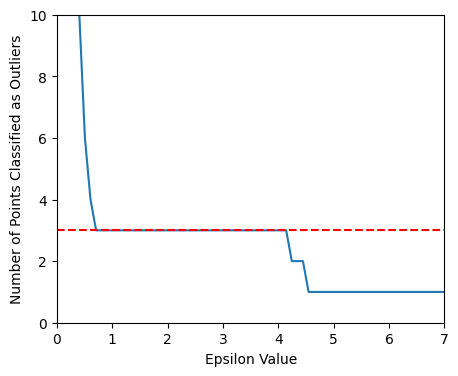

In [60]:
plt.figure(figsize=(5,4))

sns.lineplot(x=np.linspace(.001, 10, 100), y=num_outliers)

plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

plt.xlim(0, 7)
plt.ylim(0, 10)

plt.hlines(y=3, xmin=0, xmax=7, colors='red', ls='--');

In [61]:
model = DBSCAN(eps=.75)

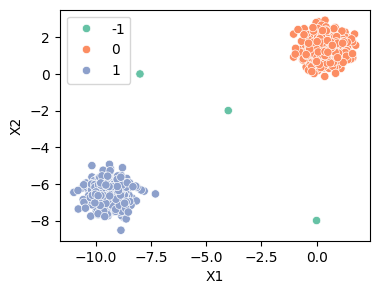

In [62]:
display_categories(model, two_blobs_outliers)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [64]:
per_outliers = []

for m in range(1,100):

    model = DBSCAN(min_samples=m)

    model.fit(two_blobs_outliers)

    N = len(model.labels_)

    outliers = np.sum( model.labels_ == -1 )

    per_outliers.append( 100*outliers / N )

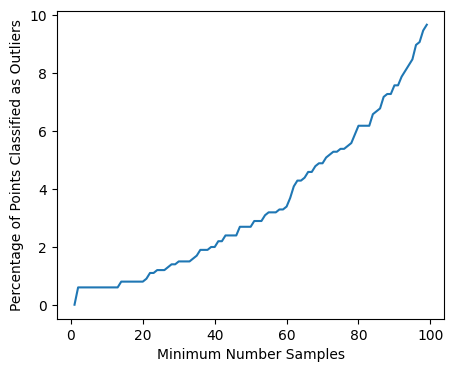

In [66]:
plt.figure(figsize=(5,4))

sns.lineplot(x=np.arange(1,100), y=per_outliers)

plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Minimum Number Samples');

In [67]:
num_features = two_blobs_outliers.shape[1]

In [68]:
num_features

2

In [69]:
model = DBSCAN(eps=.75,  min_samples= 2*num_features) 

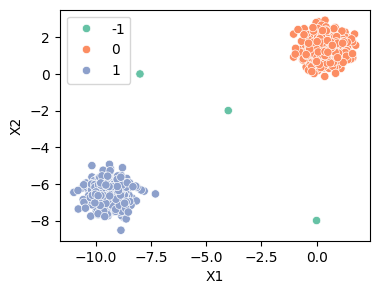

In [70]:
display_categories(model, two_blobs_outliers)